
# Spherically symmetric PDE

This example illustrates how to solve a PDE in a spherically symmetric geometry.


In [17]:
from pde import DiffusionPDE, ScalarField, SphericalSymGrid
from pprint import pprint

grid = SphericalSymGrid(radius=1, shape=128)  # generate grid
print(dir(grid))
# print(grid.get_cartesian_grid())
state = ScalarField(grid)  # generate initial condition
# print(dir(state))
eq = DiffusionPDE(0.1, bc={"r": "derivative": 0}, "r>1": {"value": 1.5}})  # define the PDE



result = eq.solve(state, t_range=0.1, dt=0.001)

result.plot(kind="image")

SyntaxError: invalid syntax (4248401266.py, line 9)

2.5e-10 mmol glucose absorbed in the cell


/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_82803/3281844378.py:40: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(sol.y[0], sol.x)


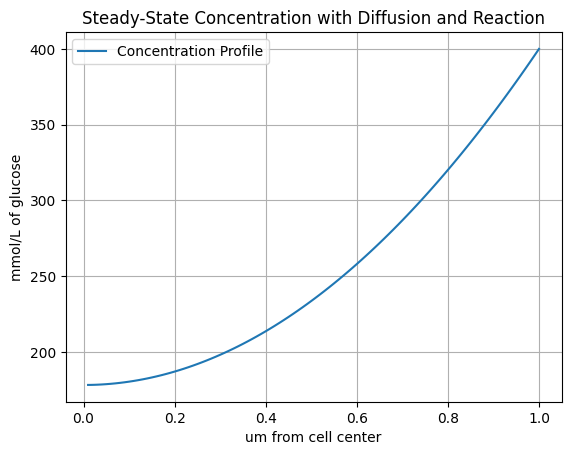

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp, simps
import sigfig

# Parameters
D = 50*60  # um^2/min Diffusivity
R = 1  # um radius
C_inf = 400  # mmol/L at r > R
# k = 0.5  # Reaction rate coefficient (assumed linear for simplicity)
Km = 0.3 # mmol/L
Vmax = 4 * (1/1e6) * (1e4)**3 # mU PFK/cell => mmol/(cm^3*min)

# Define the ODE system
def reaction_term(c):
    # return -k * C  # Example reaction: first-order decay
    return (Vmax * c) / (Km + c)   # mmol/(cm^3*min)

def spherical_system(r, c):
    dC_dr = c[1]  # mmol/(cm^3 * um)
    d2C_dr2 = - (2 / r) * dC_dr + reaction_term(c[0]) / D   # mmol/(cm^3 * um^2)
    return np.vstack((dC_dr, d2C_dr2))

def cartesian_system(r, c):
    # dC_dr = c[1]  # mmol/(cm^3 * um)
    # d2C_dr2 = - (2 / r) * dC_dr + reaction_term(c[0]) / D   # mmol/(cm^3 * um^2)
    return np.vstack((dC_dr, d2C_dr2))

# Boundary conditions
def bc(C0, C_R):
    return np.array([C0[1], C_R[0] - C_inf])  # dC/dr at r=0 is 0, C(R) = C_inf

# Radial grid
numPoints = 100
r = np.linspace(R/numPoints, R, numPoints)  # Avoid division by zero

# Initial guess for concentration
C_guess = np.zeros((2, numPoints))
C_guess[0, :] = C_inf
# print(C_guess)

# Solve BVP
for coordinates in ["spherical", "cartesian"]:
    if coordinates == "spherical":  ode_system = spherical_system
    elif coordinates == "cartesian":  ode_system = cartesian_system
    sol = solve_bvp(ode_system, bc, r, C_guess)
    sol.y[0] = [max(0, y) for y in sol.y[0]]
    area = simps(sol.y[0], sol.x)
    print(f"{sigfig.round(area/(1e4)**3, 3)} mmol glucose absorbed in the cell" )
    # print(max(sol.y[0]), min(sol.y[0]))
    # Plot results
    plt.plot(sol.x, sol.y[0], label="Concentration Profile")
    plt.xlabel("um from cell center")
    plt.ylabel("mmol/L of glucose")
    plt.title(f"Steady-State {coordinates} glucose consumption in a S. aureus")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp, simps
import sigfig

# Parameters
D = 50*60  # um^2/min Diffusivity
R = 1  # um radius
C_inf = 400  # mmol/L at r > R
# k = 0.5  # Reaction rate coefficient (assumed linear for simplicity)
Km = 0.3 # mmol/L
Vmax = 4 * (1/1e6) * (1e4)**3 # mU PFK/cell => mmol/(cm^3*min)

# Define the ODE system
def reaction_term(c):
    # return -k * C  # Example reaction: first-order decay
    return (Vmax * c) / (Km + c)   # mmol/(cm^3*min)

def ode_system(r, c):
    dC_dr = c[1]  # mmol/(cm^3 * um)
    d2C_dr2 = - (2 / r) * dC_dr + reaction_term(c[0]) / D   # mmol/(cm^3 * um^2)
    return np.vstack((dC_dr, d2C_dr2))

# Boundary conditions
def bc(C0, C_R):
    return np.array([C0[1], C_R[0] - C_inf])  # dC/dr at r=0 is 0, C(R) = C_inf

# Radial grid
numPoints = 100
r = np.linspace(R/numPoints, R, numPoints)  # Avoid division by zero

# Initial guess for concentration
C_guess = np.zeros((2, numPoints))
C_guess[0, :] = C_inf
# print(C_guess)

# Solve BVP
sol = solve_bvp(ode_system, bc, r, C_guess)
sol.y[0] = [max(0, y) for y in sol.y[0]]
area = simps(sol.y[0], sol.x)
print(f"{sigfig.round(area/(1e4)**3, 3)} mmol glucose absorbed in the cell" )
# print(max(sol.y[0]), min(sol.y[0]))
# Plot results
plt.plot(sol.x, sol.y[0], label="Concentration Profile")
plt.xlabel("um from cell center")
plt.ylabel("mmol/L of glucose")
plt.title("Steady-State Concentration with Diffusion and Reaction")
plt.legend()
plt.grid()
plt.show()
